In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [107]:
from dataset import myDataset

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
        std=[0.2023, 0.1994, 0.2010])])

batch_size = 32

# trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
#                                         download=True, transform=transform)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
#                                           shuffle=True, num_workers=2)

# testset = torchvision.datasets.CIFAR10(root='./data', train=False,
#                                        download=True, transform=transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
#                                          shuffle=False, num_workers=2)

dataset = myDataset(csv_file='dataset.csv', root_dir='images', transform=transform)
train_set, test_set = torch.utils.data.random_split(dataset, [int(len(dataset)*0.8), (len(dataset) - int(len(dataset)*0.8))])

trainloader = torch.utils.data.DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(dataset=test_set, batch_size=batch_size, shuffle=True, num_workers=2)


classes = ('66_8277', '26_7300', 'CE_9284', 'CA_2012', '89_2185', 'BA_3348', 'CO_2967', 'BI_7767', 'AN_5551', '40_7546', '39_6994', 'CU_1997', '25_7383', '12_9123', '88_7593', '37_7584', 'CL_5517', '21_7915', 'AN_3202', 'CA_2969', '71_7668', 'AS_5297', 'BA_9287', 'BA_6047', 'AL_3674', 'BU_4412', '90_1798', 'CA_9242', 'CL_3054', '45_3654', 'CO_5402', 'CE_5443')

In [44]:
# classes = ('AS_5297', 'EN_9322', 'AL_3674', 'AN_3202', 'AN_5551', 'BA_3348',
#            'BI_7767', 'BA_9287', 'BA_6047', 'CL_5517', 'CL_3054', 'ST_9228',
#            'IS_3233', 'BU_4412', 'CA_2012', 'CE_9284', 'CA_9242', 'CO_2967',
#            'ST_6209', '89_2185', 'CA_2969', 'SC_4103', 'CU_1997', 'CO_5402',
#            'DA_1494', 'TE_1222', 'DE_2834', 'JX_9890', 'EN_7665', 'EM_1329',
#            'ST_8707', 'EA_7681', 'EX_2653', 'FA_6407', '37_7584', 'FA_8861',
#            'FI_1960', 'GA_5346', 'GA_9429', 'GO_3034', 'GR_1465', 'MA_1741',
#            'LU_1220', 'GO_3007', 'GR_5986', 'SC_3434', 'GR_8567', 'HA_7479',
#            'ST_2692', 'HE_9213', '21_7915', 'IN_3095', 'CE_5443', 'IN_8918',
#            'JA_1650', '90_1798', 'KO_8739', 'KO_9606', 'KN_9743', 'GE_6275',
#            'LO_5524', 'LO_7545', 'FA_6299', 'LI_7416', 'LA_3365', 'MA_7301',
#            'MA_9292', 'LA_1306', 'ME_1743', '39_6994', 'MA_9826', 'MU_9865',
#            'MA_1364', 'MO_5908', 'MC_7625', 'ME_8426', 'NO_6035', 'NO_5305',
#            'CX_9075', 'NE_1746', '26_7300', 'OD_2380', 'ON_5652', 'LE_2709',
#            'PO_9305', 'DX_4769', 'FI_7927', 'RE_9485', 'RO_1048', 'JO_2678',
#            '25_7383', 'RO_9917', 'RE_6304', 'RA_6665', '71_7668', 'SO_3435',
#            'SU_4290', 'SI_4482', 'SA_8340', 'SI_4775', 'FA_8586', 'GE_1251',
#            'ST_9494', 'SA_2453', 'SI_4076', '40_7546', 'TR_2681', 'TO_5998',
#            'SO_6442', '45_3654', 'UN_8969', 'UN_5680', 'VA_6051', 'NO_6203',
#            'VA_2793', '12_9123', 'WA_9437', 'WE_7962', 'WI_9481', 'WO_6684',
#            'MC_1270', 'WA_3342', 'WH_7537', 'WO_6759', 'WY_3553', '66_8277',
#            '88_7593')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


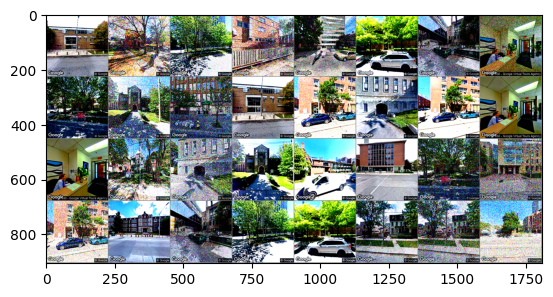

CL_3054 89_2185 BA_6047 CE_5443 12_9123 88_7593 26_7300 25_7383 21_7915 CE_9284 BI_7767 CL_3054 BU_4412 CO_2967 BU_4412 25_7383 25_7383 39_6994 CO_2967 CE_9284 AN_5551 CA_9242 21_7915 CA_2012 BU_4412 90_1798 26_7300 BA_6047 88_7593 CA_2969 CA_2969 37_7584


In [108]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [109]:
#import nn
import torch.nn as nn

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride = 1, downsample = None):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Sequential(
                        nn.Conv2d(in_channels, out_channels, kernel_size = 3, stride = stride, padding = 1),
                        nn.BatchNorm2d(out_channels),
                        nn.ReLU())
        self.conv2 = nn.Sequential(
                        nn.Conv2d(out_channels, out_channels, kernel_size = 3, stride = 1, padding = 1),
                        nn.BatchNorm2d(out_channels))
        self.downsample = downsample
        self.relu = nn.ReLU()
        self.out_channels = out_channels
        
    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.conv2(out)
        if self.downsample:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out

In [110]:
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes = 10):
        super(ResNet, self).__init__()
        self.inplanes = 64
        self.conv1 = nn.Sequential(
                        nn.Conv2d(3, 64, kernel_size = 7, stride = 2, padding = 3),
                        nn.BatchNorm2d(64),
                        nn.ReLU())
        self.maxpool = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)
        self.layer0 = self._make_layer(block, 64, layers[0], stride = 1)
        self.layer1 = self._make_layer(block, 128, layers[1], stride = 2)
        self.layer2 = self._make_layer(block, 256, layers[2], stride = 2)
        self.layer3 = self._make_layer(block, 512, layers[3], stride = 2)
        self.avgpool = nn.AvgPool2d(7, stride=1)
        self.fc = nn.Linear(512, num_classes)
        
    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes:
            
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes, kernel_size=1, stride=stride),
                nn.BatchNorm2d(planes),
            )
        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)
    
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.maxpool(x)
        x = self.layer0(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x

# net = ResNet(ResidualBlock, [3, 4, 6, 3], num_classes = 127)

In [80]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 128)

    def forward(self, x):
        # Get the original input size
        original_size = x.size()[2:]
        
        # Resize the input to the required size (e.g., (32, 32))
        required_size = (32, 32)
        if original_size != required_size:
            x = F.interpolate(x, size=required_size, mode='bilinear', align_corners=False)
        
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [115]:
import torch.optim as optim
net = ResNet(ResidualBlock, [3, 4, 6, 3], num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [117]:
num_classes = 33
num_epochs = 50
batch_size = 32
learning_rate = 0.001

net = ResNet(ResidualBlock, [3, 4, 6, 3], num_classes=num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, weight_decay = 0.001, momentum = 0.9)

In [118]:
for epoch in range(num_epochs):  # loop over the dataset multiple times
    print(f"epoch {epoch}")
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        print(f"epoch {epoch}: {i}")
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        # if i % 2000 == 1999:    # print every 2000 mini-batches
        #     print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
        #     running_loss = 0.0
    print(f'[{epoch + 1}] loss: {running_loss / (i + 1):.3f}')

print('Finished Training')

epoch 0
epoch 0: 0
epoch 0: 1
epoch 0: 2
epoch 0: 3
epoch 0: 4
epoch 0: 5
epoch 0: 6
epoch 0: 7
epoch 0: 8
epoch 0: 9
epoch 0: 10
epoch 0: 11
epoch 0: 12
epoch 0: 13
epoch 0: 14
epoch 0: 15
epoch 0: 16
[1] loss: 3.535
epoch 1
epoch 1: 0
epoch 1: 1
epoch 1: 2
epoch 1: 3
epoch 1: 4
epoch 1: 5
epoch 1: 6
epoch 1: 7
epoch 1: 8
epoch 1: 9
epoch 1: 10
epoch 1: 11
epoch 1: 12
epoch 1: 13
epoch 1: 14
epoch 1: 15
epoch 1: 16
[2] loss: 2.821
epoch 2
epoch 2: 0
epoch 2: 1
epoch 2: 2
epoch 2: 3
epoch 2: 4
epoch 2: 5
epoch 2: 6
epoch 2: 7
epoch 2: 8
epoch 2: 9
epoch 2: 10
epoch 2: 11
epoch 2: 12
epoch 2: 13
epoch 2: 14
epoch 2: 15
epoch 2: 16
[3] loss: 1.838
epoch 3
epoch 3: 0
epoch 3: 1
epoch 3: 2
epoch 3: 3
epoch 3: 4
epoch 3: 5
epoch 3: 6
epoch 3: 7
epoch 3: 8
epoch 3: 9
epoch 3: 10
epoch 3: 11
epoch 3: 12
epoch 3: 13
epoch 3: 14
epoch 3: 15
epoch 3: 16
[4] loss: 1.079
epoch 4
epoch 4: 0
epoch 4: 1
epoch 4: 2
epoch 4: 3
epoch 4: 4
epoch 4: 5
epoch 4: 6
epoch 4: 7
epoch 4: 8
epoch 4: 9
epoch 4: 1

In [119]:
PATH = './ResNet34_32_81.pth'
torch.save(net.state_dict(), PATH)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


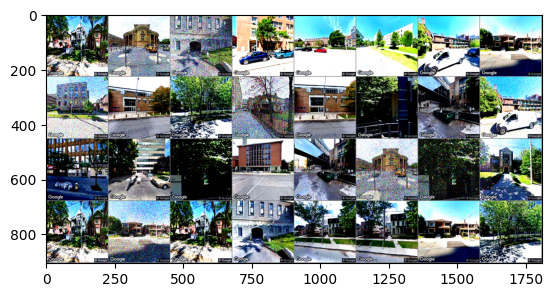

GroundTruth:  39_6994 CU_1997 CO_2967 BU_4412 AN_3202 BA_3348 AN_5551 BA_9287 CO_5402 CL_3054 BA_6047 AS_5297 CL_3054 AL_3674 26_7300 AN_5551 BI_7767 12_9123 AL_3674 CA_9242 26_7300 CU_1997 AL_3674 CE_9284 39_6994 BA_9287 39_6994 CO_2967 CA_2969 CA_2969 BA_9287 BA_6047


In [121]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [130]:
# net = Net()
net = ResNet(ResidualBlock, [3, 4, 6, 3], num_classes=num_classes)
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [124]:
outputs = net(images)

In [128]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(num_classes)))

IndexError: tuple index out of range

In [129]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 0 %


In [91]:
# # prepare to count predictions for each class
# correct_pred = {classname: 0 for classname in classes}
# total_pred = {classname: 0 for classname in classes}

# # again no gradients needed
# with torch.no_grad():
#     for data in testloader:
#         images, labels = data
#         outputs = net(images)
#         _, predictions = torch.max(outputs, 1)
#         # collect the correct predictions for each class
#         for label, prediction in zip(labels, predictions):
#             if label == prediction:
#                 correct_pred[classes[label-1]] += 1
#             total_pred[classes[label-1]] += 1


# # print accuracy for each class
# for classname, correct_count in correct_pred.items():
#     accuracy = 100 * float(correct_count) / total_pred[classname]
#     print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label-1]] += 1
            total_pred[classes[label-1]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    total_count = total_pred[classname]
    if total_count != 0:
        accuracy = 100 * float(correct_count) / total_count
        print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')
    else:
        print(f'Accuracy for class: {classname:5s} is N/A (no predictions)')

Accuracy for class: AS_5297 is 100.0 %
Accuracy for class: EN_9322 is 100.0 %
Accuracy for class: AL_3674 is 100.0 %
Accuracy for class: AN_3202 is 100.0 %
Accuracy for class: AN_5551 is 100.0 %
Accuracy for class: BA_3348 is 100.0 %
Accuracy for class: BI_7767 is 100.0 %
Accuracy for class: BA_9287 is 100.0 %
Accuracy for class: BA_6047 is 100.0 %
Accuracy for class: CL_5517 is 100.0 %
Accuracy for class: CL_3054 is 100.0 %
Accuracy for class: ST_9228 is 100.0 %
Accuracy for class: IS_3233 is 100.0 %
Accuracy for class: BU_4412 is 100.0 %
Accuracy for class: CA_2012 is 100.0 %
Accuracy for class: CE_9284 is 100.0 %
Accuracy for class: CA_9242 is 100.0 %
Accuracy for class: CO_2967 is 100.0 %
Accuracy for class: ST_6209 is 100.0 %
Accuracy for class: 89_2185 is 100.0 %
Accuracy for class: CA_2969 is 100.0 %
Accuracy for class: SC_4103 is 100.0 %
Accuracy for class: CU_1997 is 100.0 %
Accuracy for class: CO_5402 is 100.0 %
Accuracy for class: DA_1494 is 100.0 %
Accuracy for class: TE_12